<a href="https://colab.research.google.com/github/CRPeace/Grocery_Store_Sales_Analysis_ML/blob/main/Big_Mart_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Big Mart Sales Analysis
##### Cameron Peace

##### Data Background and Data Dictionary

The dataset used in this analysis was originally provided by [Analytics Vidhya](https://datahack.analyticsvidhya.com/) for use in a data analysis [practice competition](https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/#About).  It includes data on products from the grocery store chain [Big Mart](https://www.bigmart.ae/index.html), which has locations mostly in India and the United Arab Emirates. From [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2016/02/bigmart-sales-solution-top-20/): **"The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities."*

* Variable Name: --	Description
* Item_Identifier: --	Unique product ID
* Item_Weight: --	Weight of product
* Item_Fat_Content: --	Whether the product is low fat or regular
* Item_Visibility: --	The percentage of total display area of all products in a store allocated to the particular product
* Item_Type: --	The category to which the product belongs
* Item_MRP: --	Maximum Retail Price (list price) of the product
* Outlet_Identifier: --	Unique store ID
* Outlet_Establishment_Year: --	The year in which store was established
* Outlet_Size: --	The size of the store in terms of ground area covered
* Outlet_Location_Type: --	The type of area in which the store is located
* Outlet_Type: --	Whether the outlet is a grocery store or some sort of supermarket
* Item_Outlet_Sales: --	Sales of the product in the particular store. This is the target variable to be predicted.

### <font color='green'> Loading Data </font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from google.colab import files
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('/content/sales_predictions.csv')

In [3]:
display(df.head(), round(df.describe(), 2), df.info(), df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.64,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,8.77,0.03,93.83,1987.00,834.25
50%,12.60,0.05,143.01,1999.00,1794.33
75%,16.85,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


None

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### <font color='green'>Data Cleaning</font>

In [4]:
# fixing column names to preference
df = df.rename(columns = lambda x: x.lower())

In [5]:
df.shape

(8523, 12)

In [6]:
df.dtypes

item_identifier               object
item_weight                  float64
item_fat_content              object
item_visibility              float64
item_type                     object
item_mrp                     float64
outlet_identifier             object
outlet_establishment_year      int64
outlet_size                   object
outlet_location_type          object
outlet_type                   object
item_outlet_sales            float64
dtype: object

In [7]:
print(f'There are {df.duplicated().sum()} duplicate rows in the dataset')

There are 0 duplicate rows in the dataset


<u>Comment:</u> <br>
<font color='dodgerblue'> <i>
We have 8,523 rows and 12 columns, a mix of categorical and numeric data and no duplicates in the dataset
</i></font>

In [8]:
# Looks like we have missing values in the "Item_Weight" and "Outlet_Size" columns
df.isna().sum()

item_identifier                 0
item_weight                  1463
item_fat_content                0
item_visibility                 0
item_type                       0
item_mrp                        0
outlet_identifier               0
outlet_establishment_year       0
outlet_size                  2410
outlet_location_type            0
outlet_type                     0
item_outlet_sales               0
dtype: int64

In [9]:
# taking a look at other values in the rows with missing weight in case there is a pattern.
df[df['item_weight'].isna()]
df[df['item_weight'].isna()]['outlet_identifier'].value_counts()

OUT027    935
OUT019    528
Name: outlet_identifier, dtype: int64

In [10]:
# Looking at the percentages of data that OUT027 and OUT019 would represent
df['outlet_identifier'].value_counts(normalize=True)  

OUT027    0.109703
OUT013    0.109351
OUT049    0.109117
OUT046    0.109117
OUT035    0.109117
OUT045    0.108999
OUT018    0.108882
OUT017    0.108647
OUT010    0.065118
OUT019    0.061950
Name: outlet_identifier, dtype: float64

<u>Comment:</u> <br>
<font color='dodgerblue'> <i>
* There are 1463 missing values in the 'item_weight' column that are confined to data from two stores (outlets 19 and 27).  It would be simplest to just drop these values, but we would lose 17% of the data in that case.  I'm making the call to just drop this column, since I believe any analysis of item weight in the dataset would be flawed.  Furthermore, because we are focused on sales, I don't believe item weight is a crucial factor in this analysis.  If we were focused on something such as fuel efficiency of the supply chain, truck unloading time, etc, then I could see it as a factor, but for most items purchased at a grocery store, weight is not a large consideration for the consumer.
* There are 2410 missing values in the 'outlet_type' category, these will be filled with 'missing value'</i></font>

In [11]:
# making a copy of the df to create a 'save' point for the cleaning process
cleaned = df.copy()

In [12]:
# dropping the 'item_weight' column
cleaned = cleaned.drop(columns='item_weight').copy()

In [13]:
# verifying that we're dropped the column
print(cleaned.shape)
cleaned.columns

(8523, 11)


Index(['item_identifier', 'item_fat_content', 'item_visibility', 'item_type',
       'item_mrp', 'outlet_identifier', 'outlet_establishment_year',
       'outlet_size', 'outlet_location_type', 'outlet_type',
       'item_outlet_sales'],
      dtype='object')

In [14]:
# Now filling all nulls from "Outlet_Size" with 'missing value'
cleaned['outlet_size'] = cleaned['outlet_size'].fillna('missing value')

In [15]:
# Verifying that there are no more missing values in the whole dataset
cleaned.isna().sum()

item_identifier              0
item_fat_content             0
item_visibility              0
item_type                    0
item_mrp                     0
outlet_identifier            0
outlet_establishment_year    0
outlet_size                  0
outlet_location_type         0
outlet_type                  0
item_outlet_sales            0
dtype: int64

In [16]:
cleaned.columns # printing out column names to copy

Index(['item_identifier', 'item_fat_content', 'item_visibility', 'item_type',
       'item_mrp', 'outlet_identifier', 'outlet_establishment_year',
       'outlet_size', 'outlet_location_type', 'outlet_type',
       'item_outlet_sales'],
      dtype='object')

In [17]:
# looking at categorical columns to check for incorrect values
my_columns = ['item_fat_content',
       'item_type', 'outlet_identifier',
       'outlet_establishment_year', 'outlet_size', 'outlet_location_type',
       'outlet_type']
for i in my_columns:
  print(i.upper(), '****\n', cleaned[i].value_counts(dropna=False))
  print('**************\n\n')

ITEM_FAT_CONTENT ****
 Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: item_fat_content, dtype: int64
**************


ITEM_TYPE ****
 Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: item_type, dtype: int64
**************


OUTLET_IDENTIFIER ****
 OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: outlet_identifier, dtype: int64
**************


OUTLET_ESTABLISHMENT_YEAR ****
 1985    1463
1987     932
1999     930
1997     9

<u>Comment:</u> <br>
<font color='dodgerblue'> <i>
* The 'item_fat_content' has several inconsistent labels.  Will fix iterations of 'Regular' and 'Low Fat' to those two categories
* The 'outlet_size' has a label of 'High' which should probably be 'Large', will leave this one for now and revisit if it's relevant.</i></font>

In [18]:
#Fixing the "item_fat_content" column with apply and a separate function
def fix_fat_label(label):
  if  label== 'low fat':
    return 'Low Fat'
  elif label == 'LF':
    return 'Low Fat'
  elif label == 'reg':
    return 'Regular'
  else:
    return label
    
cleaned.loc[:,'item_fat_content'] = cleaned.loc[:,'item_fat_content'].apply(fix_fat_label)

In [19]:
# checking things
cleaned['item_fat_content'].value_counts()

Low Fat    5517
Regular    3006
Name: item_fat_content, dtype: int64

In [20]:
cleaned.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
item_identifier,8523,1559,FDW13,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
item_fat_content,8523,2,Low Fat,5517,NaN,NaN,NaN,NaN,NaN,NaN,NaN
item_visibility,8523.0,NaN,NaN,NaN,0.066132,0.051598,0.0,0.026989,0.053931,0.094585,0.328391
item_type,8523,16,Fruits and Vegetables,1232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
item_mrp,8523.0,NaN,NaN,NaN,140.992782,62.275067,31.29,93.8265,143.0128,185.6437,266.8884
outlet_identifier,8523,10,OUT027,935,NaN,NaN,NaN,NaN,NaN,NaN,NaN
outlet_establishment_year,8523.0,NaN,NaN,NaN,1997.831867,8.37176,1985.0,1987.0,1999.0,2004.0,2009.0
outlet_size,8523,4,Medium,2793,NaN,NaN,NaN,NaN,NaN,NaN,NaN
outlet_location_type,8523,3,Tier 3,3350,NaN,NaN,NaN,NaN,NaN,NaN,NaN
outlet_type,8523,4,Supermarket Type1,5577,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### <font color='green'>Exploratory Visuals</font>

In [21]:
# making another copy as a 'save' point for comparison as needed
cln_df = cleaned.copy()

In [22]:
# another look at the data
cln_df.head()

,item_identifier,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,missing value,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [23]:
# taking a look at what may be driving sales
cln_df.sort_values('item_outlet_sales', ascending=False).head(30)

,item_identifier,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
7188,NCE42,Low Fat,0.010551,Household,234.9958,OUT027,1985,Medium,Tier 3,Supermarket Type3,13086.9648
5223,FDQ19,Regular,0.014296,Fruits and Vegetables,242.6512,OUT027,1985,Medium,Tier 3,Supermarket Type3,12117.5600
1450,FDZ20,Low Fat,0.000000,Fruits and Vegetables,253.0356,OUT027,1985,Medium,Tier 3,Supermarket Type3,11445.1020
4349,FDP33,Low Fat,0.088840,Snack Foods,254.2672,OUT027,1985,Medium,Tier 3,Supermarket Type3,10993.6896
6541,FDI50,Regular,0.030693,Canned,228.0352,OUT027,1985,Medium,Tier 3,Supermarket Type3,10306.5840
4888,FDF39,Regular,0.019495,Dairy,261.2910,OUT013,1987,High,Tier 3,Supermarket Type1,10256.6490
1009,FDU14,Low Fat,0.034584,Dairy,248.3750,OUT027,1985,Medium,Tier 3,Supermarket Type3,10236.6750
7191,NCH18,Low Fat,0.044445,Household,245.2802,OUT027,1985,Medium,Tier 3,Supermarket Type3,10072.8882
4289,NCM05,Low Fat,0.059847,Health and Hygiene,262.5226,OUT046,1997,Small,Tier 1,Supermarket Type1,9779.9362
7752,FDC17,Low Fat,0.015386,Frozen Foods,208.9928,OUT027,1985,Medium,Tier 3,Supermarket Type3,9678.0688


<u>Comment:</u> <br>
<font color='dodgerblue'> <i>
The individual store (OUT027) seems to be over represented in these high sales entries
</i></font>

#### **Correlation Check**

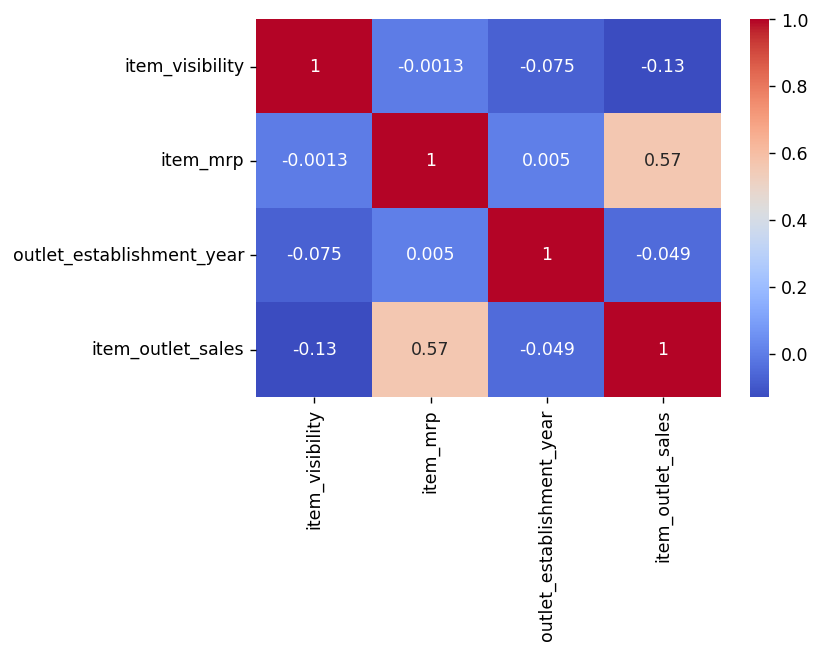

In [24]:
# Taking a look at correlated aspects to the data
plt.figure(figsize= (6, 4), dpi=125)
sns.heatmap(cln_df.corr(), cmap='coolwarm', annot=True);

<font color='dodgerblue'><b>Not a whole lot to learn from here, 'item outlet sales' is correlated with 'item mrp' (maximum retail price), which makes sense.  There are not many numeric variables in this dataset. I find it surprising that 'item_visibility' is not correlated with 'item_outlet_sales'.</font>

#### **Exploring Item Visibility**

<font color='dodgerblue'>Definition from the Data Dictionary:
* **Item_Visibility:** -- The percentage of total display area of all products in a store allocated to the particular product </font>
<br> <br>
<font color='dodgerblue'> I'm going to spend some time exploring Item Visibility, despite the fact that we've already learned it is not highly correlated with any other feature from the dataset, I'd like to see what I can glean.

In [25]:
# quick look at lowest and highest visibility items to look for patterns
display(cln_df.sort_values('item_visibility').head(10), cln_df.sort_values('item_visibility').tail(10))

,item_identifier,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
596,FDU04,Low Fat,0.0,Frozen Foods,123.2414,OUT018,2009,Medium,Tier 3,Supermarket Type2,487.3656
5881,NCP17,Low Fat,0.0,Health and Hygiene,65.3168,OUT010,1998,missing value,Tier 3,Grocery Store,191.7504
3255,FDI38,Regular,0.0,Canned,206.9638,OUT017,2007,missing value,Tier 2,Supermarket Type1,7247.2330
3257,FDS55,Low Fat,0.0,Fruits and Vegetables,148.1734,OUT018,2009,Medium,Tier 3,Supermarket Type2,890.8404
3259,NCP55,Low Fat,0.0,Others,53.8614,OUT035,2004,Small,Tier 2,Supermarket Type1,1105.2280
3290,NCG55,Low Fat,0.0,Household,115.2176,OUT017,2007,missing value,Tier 2,Supermarket Type1,3206.4928
3315,FDU36,Low Fat,0.0,Baking Goods,100.1384,OUT027,1985,Medium,Tier 3,Supermarket Type3,2956.1520
5885,NCB43,Low Fat,0.0,Household,187.1898,OUT013,1987,High,Tier 3,Supermarket Type1,2993.4368
3350,FDN46,Regular,0.0,Snack Foods,103.1332,OUT017,2007,missing value,Tier 2,Supermarket Type1,3281.0624
3360,FDU32,Low Fat,0.0,Fruits and Vegetables,120.5414,OUT013,1987,High,Tier 3,Supermarket Type1,1583.9382


,item_identifier,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
5150,FDR14,Low Fat,0.304737,Dairy,54.7298,OUT019,1985,Small,Tier 1,Grocery Store,107.8596
3474,FDS12,Low Fat,0.304859,Baking Goods,125.4362,OUT019,1985,Small,Tier 1,Grocery Store,755.0172
6622,FDI32,Low Fat,0.305305,Fruits and Vegetables,116.6834,OUT019,1985,Small,Tier 1,Grocery Store,460.7336
7603,DRF01,Low Fat,0.306543,Soft Drinks,147.3102,OUT019,1985,Small,Tier 1,Grocery Store,291.6204
4382,FDG32,Low Fat,0.308145,Fruits and Vegetables,222.0772,OUT019,1985,Small,Tier 1,Grocery Store,889.5088
2855,NCE31,Low Fat,0.309390,Household,33.2216,OUT010,1998,missing value,Tier 3,Grocery Store,138.4864
7250,FDT24,Regular,0.311090,Baking Goods,79.2328,OUT010,1998,missing value,Tier 3,Grocery Store,154.4656
1805,FDJ56,Low Fat,0.321115,Fruits and Vegetables,100.7700,OUT019,1985,Small,Tier 1,Grocery Store,199.7400
3750,NCZ18,Low Fat,0.325781,Household,252.7698,OUT019,1985,Small,Tier 1,Grocery Store,761.0094
854,FDU13,Low Fat,0.328391,Canned,146.0418,OUT019,1985,Small,Tier 1,Grocery Store,588.5672


In [26]:
# creating filters for item visibility
only_visible = cln_df[cln_df['item_visibility'] != 0.00]
super_high_vis = cln_df[cln_df['item_visibility'] > .25]
high_vis = cln_df[cln_df['item_visibility'] > .15]
low_vis = only_visible[only_visible['item_visibility'] < .15] # don't want to see the items with no visiblity

Text(0.5, 1.0, 'Very High Visibility')

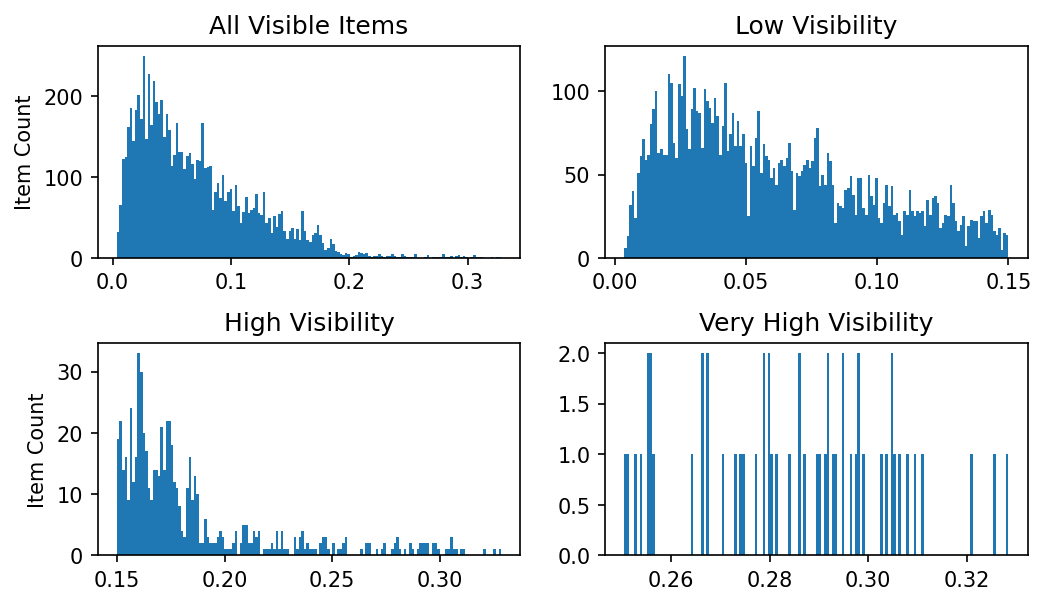

In [27]:
# Most of the items in the stores seem to be low or no visibility, it would be interesting to see if there is a pattern
# Perhaps price drives higher visibility?  Item type?

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 4.5), dpi=150)
plt.subplots_adjust(hspace=.4)
ax1.hist(only_visible['item_visibility'], bins=150);
ax1.set_title('All Visible Items')
ax1.set_ylabel('Item Count')

ax2.hist(low_vis['item_visibility'], bins=150);
ax2.set_title('Low Visibility')

ax3.hist(high_vis['item_visibility'], bins=150);
ax3.set_title('High Visibility')
ax3.set_ylabel('Item Count')

ax4.hist(super_high_vis['item_visibility'], bins=150);
ax4.set_title('Very High Visibility')

<font color='blue'>The item counts distribution has a heavy right skew, which makes sense (there is only so much display surface in the store).  Each filter on visibility is serving as a sort of zoom in on each segment of the visibility distribution.  It will be interesting to explore if any of the very high visibilty products follow a trend and/or there is enough information present in the dataset on which to speculate a casual link. </font>

In [28]:
# looking for patterns, trends
super_high_vis

,item_identifier,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
49,FDS02,Regular,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176
83,NCL18,Low Fat,0.293418,Household,194.6136,OUT019,1985,Small,Tier 1,Grocery Store,583.2408
108,DRE60,Low Fat,0.278974,Soft Drinks,225.3720,OUT019,1985,Small,Tier 1,Grocery Store,679.1160
174,FDI32,Low Fat,0.291865,Fruits and Vegetables,115.1834,OUT010,1998,missing value,Tier 3,Grocery Store,345.5502
434,FDW27,Regular,0.264125,Meat,155.7314,OUT019,1985,Small,Tier 1,Grocery Store,155.1314
521,FDC15,Low Fat,0.297884,Dairy,156.7288,OUT010,1998,missing value,Tier 3,Grocery Store,314.2576
854,FDU13,Low Fat,0.328391,Canned,146.0418,OUT019,1985,Small,Tier 1,Grocery Store,588.5672
1311,FDV28,Regular,0.267353,Frozen Foods,34.9558,OUT010,1998,missing value,Tier 3,Grocery Store,67.9116
1324,FDO23,Low Fat,0.256375,Breads,94.8436,OUT019,1985,Small,Tier 1,Grocery Store,567.2616
1496,NCJ17,Low Fat,0.255348,Health and Hygiene,84.4224,OUT010,1998,missing value,Tier 3,Grocery Store,170.4448


In [29]:
# Looking at a possible pattern in greater depth
super_high_vis['item_fat_content'].value_counts(normalize=True)

Low Fat    0.636364
Regular    0.363636
Name: item_fat_content, dtype: float64

<font color='dodgerblue'>Exploring a little more leads me to speculate on two potential causes for the high visibility values:</font>
<font color='dodgerblue'>
* **The high visibility values could represent erroneous values in the dataset, since all products with visibility score exceeding 0.25 are tied to specific outlets/stores (OUT010 & OUT019).  It does seem suspect that a full 1/4 (or greater!) of all display area within a store is dedicated to 1 product**.  
* **However, since these represent the only "Grocery Store" type outlets in the dataset, it also seems reasonable to assume that the stores are physically much smaller and 1/4 of all display area would make sense, I would need to consult with a subject matter expert**.  
</font>
<font color='dodgerblue'>

If I were to spend more time on this facet of the data, I would attempt to find correlations between visibility and other attributes.  The intial heatmap is not revealing a correlation, but there may be subsets within ranges of visibility scores that show trends. However, the overall lesson here for now seems to be that the grocery stores in the dataset show greater item visibility scores, most likely lending to their physically smaller size.</font>

#### Exploring Item Types

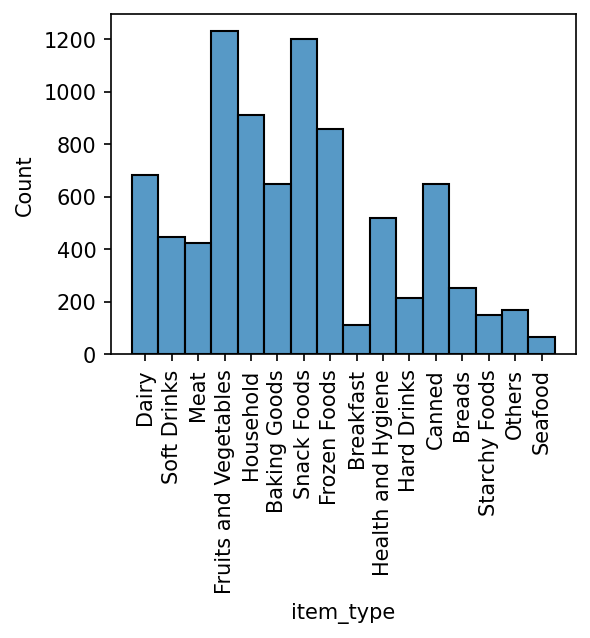

In [30]:
plt.figure(figsize=(4,3), dpi=150)
sns.histplot(cln_df['item_type']);
plt.xticks(rotation=90);

<font color='dodgerblue'> Not a whole lot of surprises here.  Here are some observations: </font>
<font color='dodgerblue'>
* **The "Fruits and Vegetables" count seems quite large, may reflect the regional variety of species, combined with seasonality. In other words, there may be a greater number of specific products that fit into this category**
* **Some categories could probably be combined, it is hard to know where the dividing lines are without more information. e.g. Starchy Foods seem to have overlap with Snacks, Baking Goods, Breads, etc.**
* **It would be interesting to see if these counts varied by specific store, perhaps revealing regional trends and preferences.**
* **The counts may also vary based on the type of market.**
</font>
<font color='dodgerblue'>

It would be interesting to definitively learn where these outlets are located geographically. </font>

#### Exploring Outlet Types

<font color='dodgerblue'> In this section I will be looking at what effect Outlet Type has on the other categorical variables in the dataset

In [31]:
# grabbing columns to copy/paste from
cln_df.columns

Index(['item_identifier', 'item_fat_content', 'item_visibility', 'item_type',
       'item_mrp', 'outlet_identifier', 'outlet_establishment_year',
       'outlet_size', 'outlet_location_type', 'outlet_type',
       'item_outlet_sales'],
      dtype='object')

In [32]:
# These are categorical variables I will compare between different outlet types.
features = ['item_fat_content',
       'item_type', 'outlet_identifier',
       'outlet_establishment_year', 'outlet_size', 'outlet_location_type']

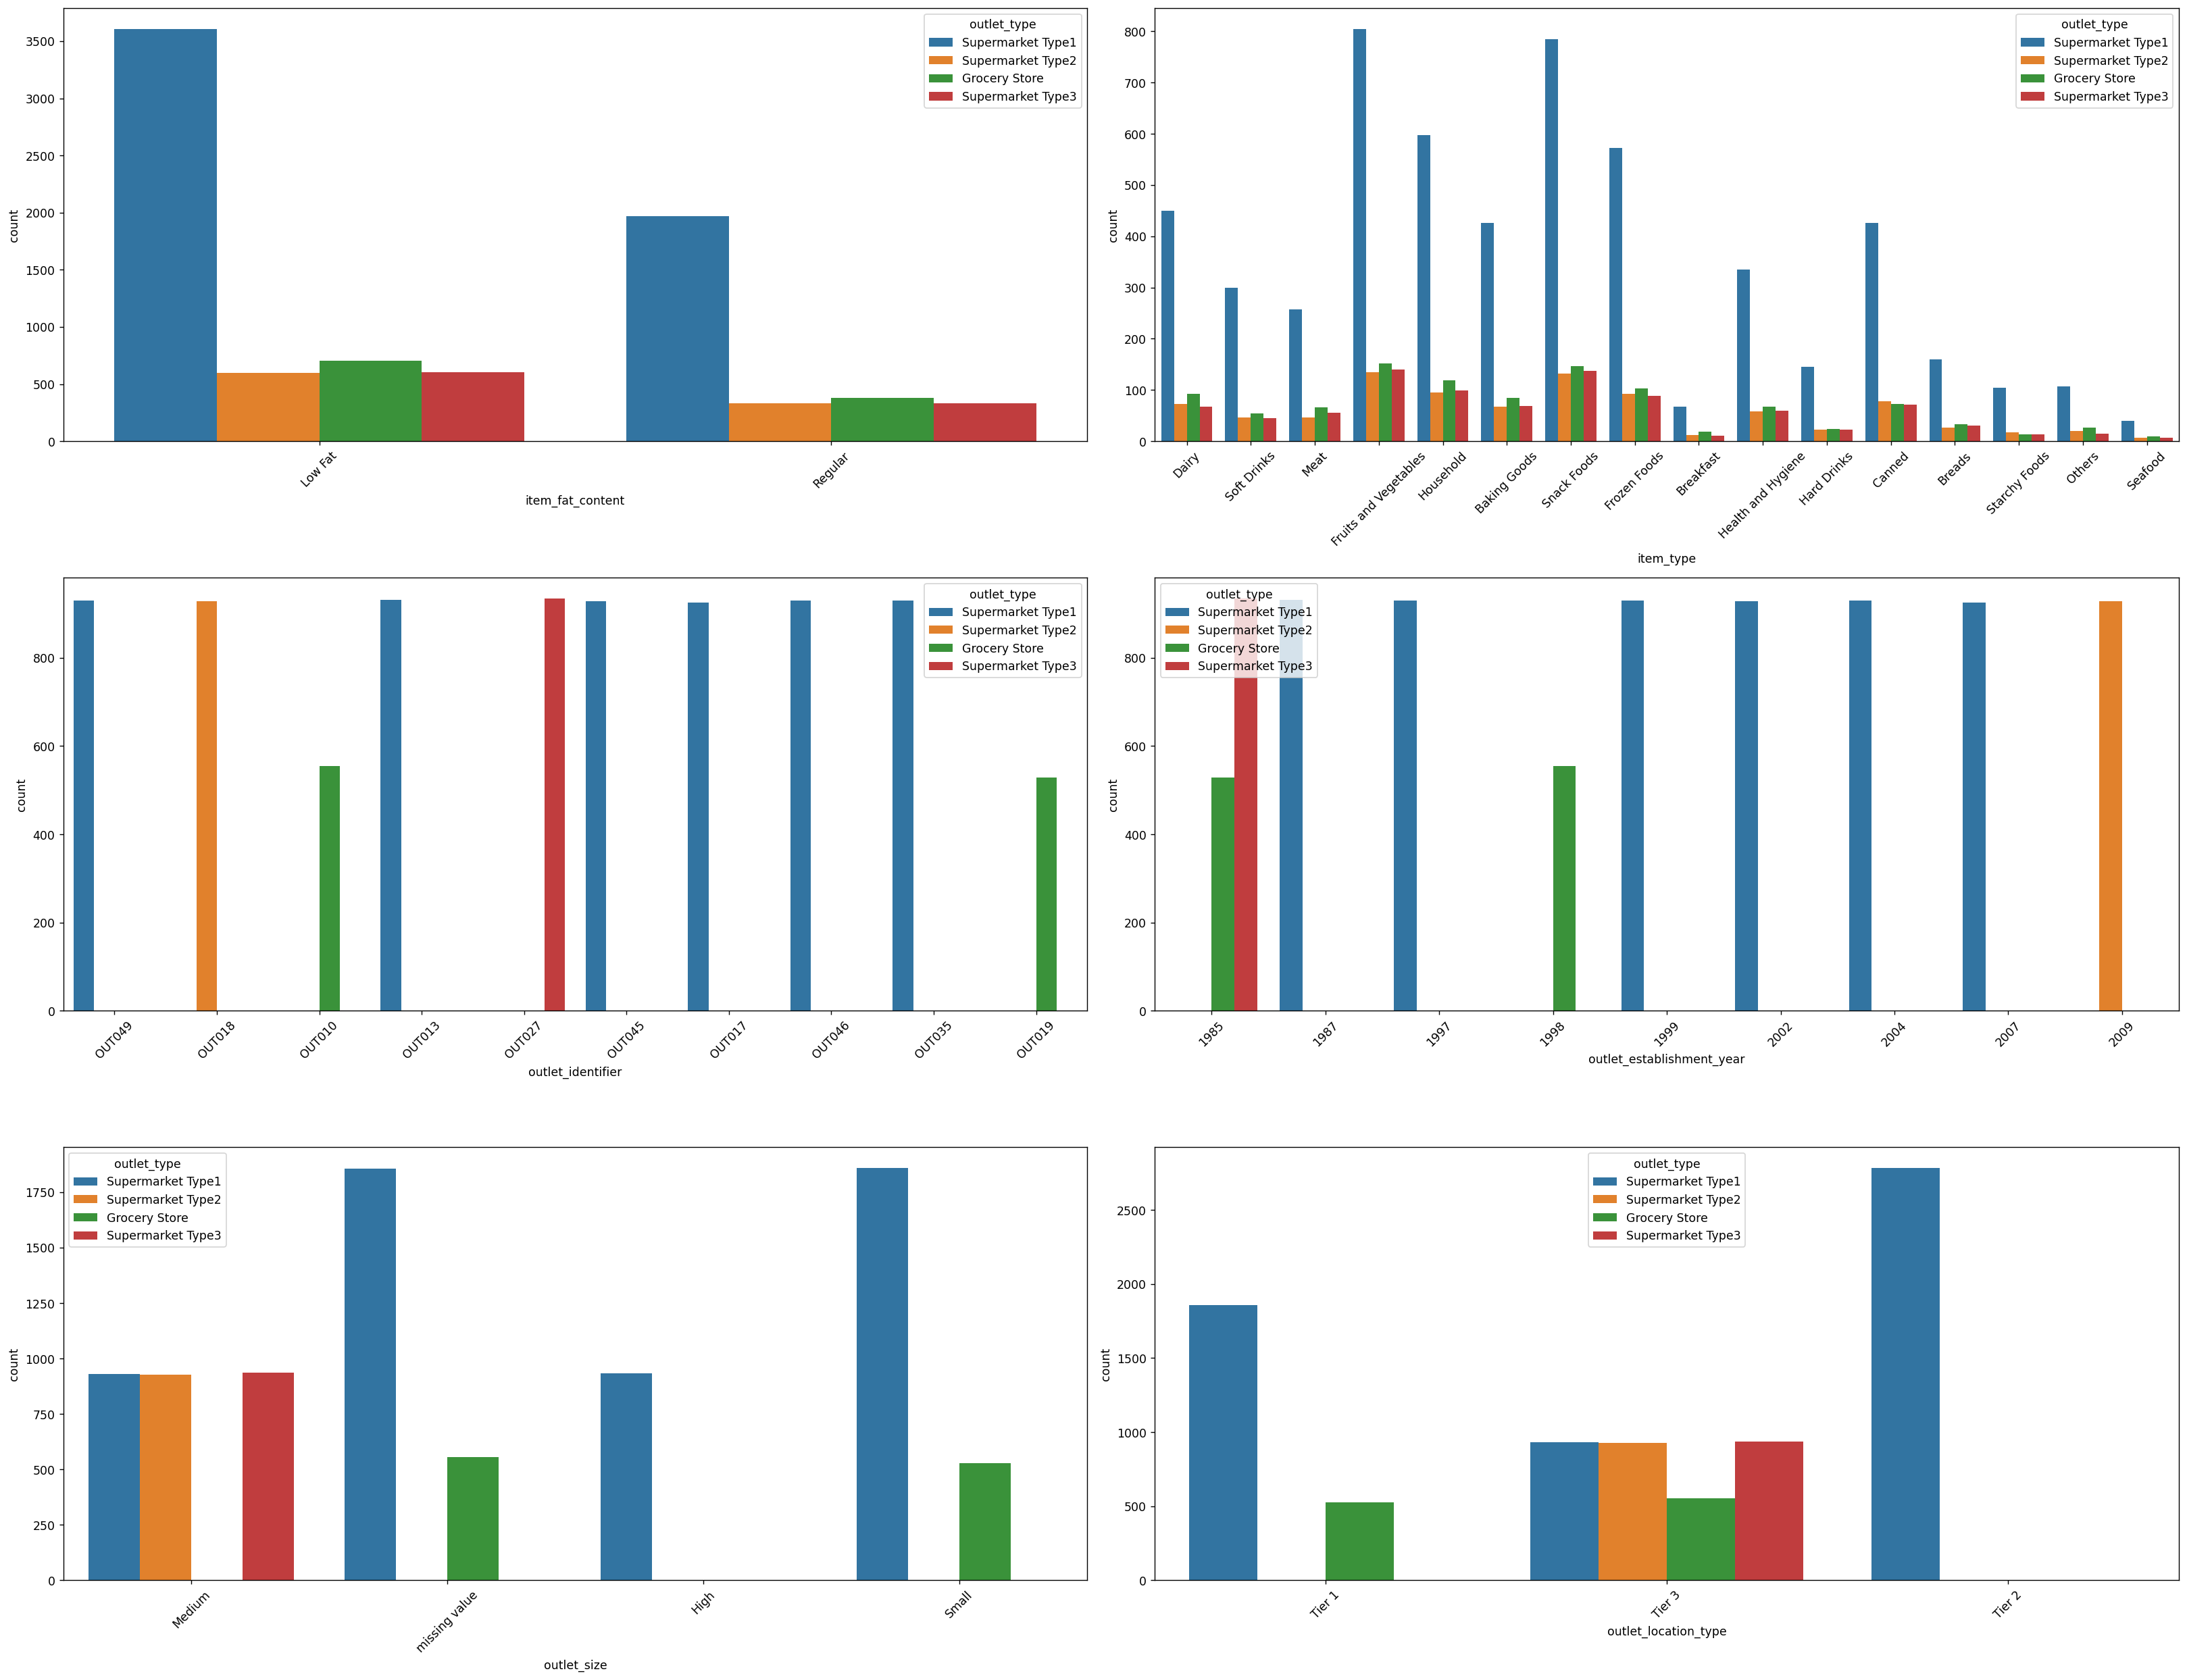

In [33]:
# This code was modeled after a youtube video after searching for ways to use subplots and for loops
# https://www.youtube.com/watch?v=4DnWYK88-E4&ab_channel=SessionWithSumit
plt.figure(figsize=(26, 20), dpi = 125)
for i, v in enumerate(features, 1):
  plt.subplot(3, 2, i)
  sns.countplot(x = v, hue= 'outlet_type', data=cln_df);
  plt.xticks(rotation=45)
  plt.tight_layout()

<font color='dodgerblue'> I see very few avenues worth exploring here, I think the main lesson from these visualizations is how dominant the 'Supermarket Type1' Outlet Types are in this dataset.  The lack of Grocery Stores, Type2, and Type 3 outlets make this a difficult aspect of the data to explore. </font>

#### Exploring Item Outlet Sales

<font color='dodgerblue'> Here we will look at how various aspects of the dataset are affecting item_outlet_sales

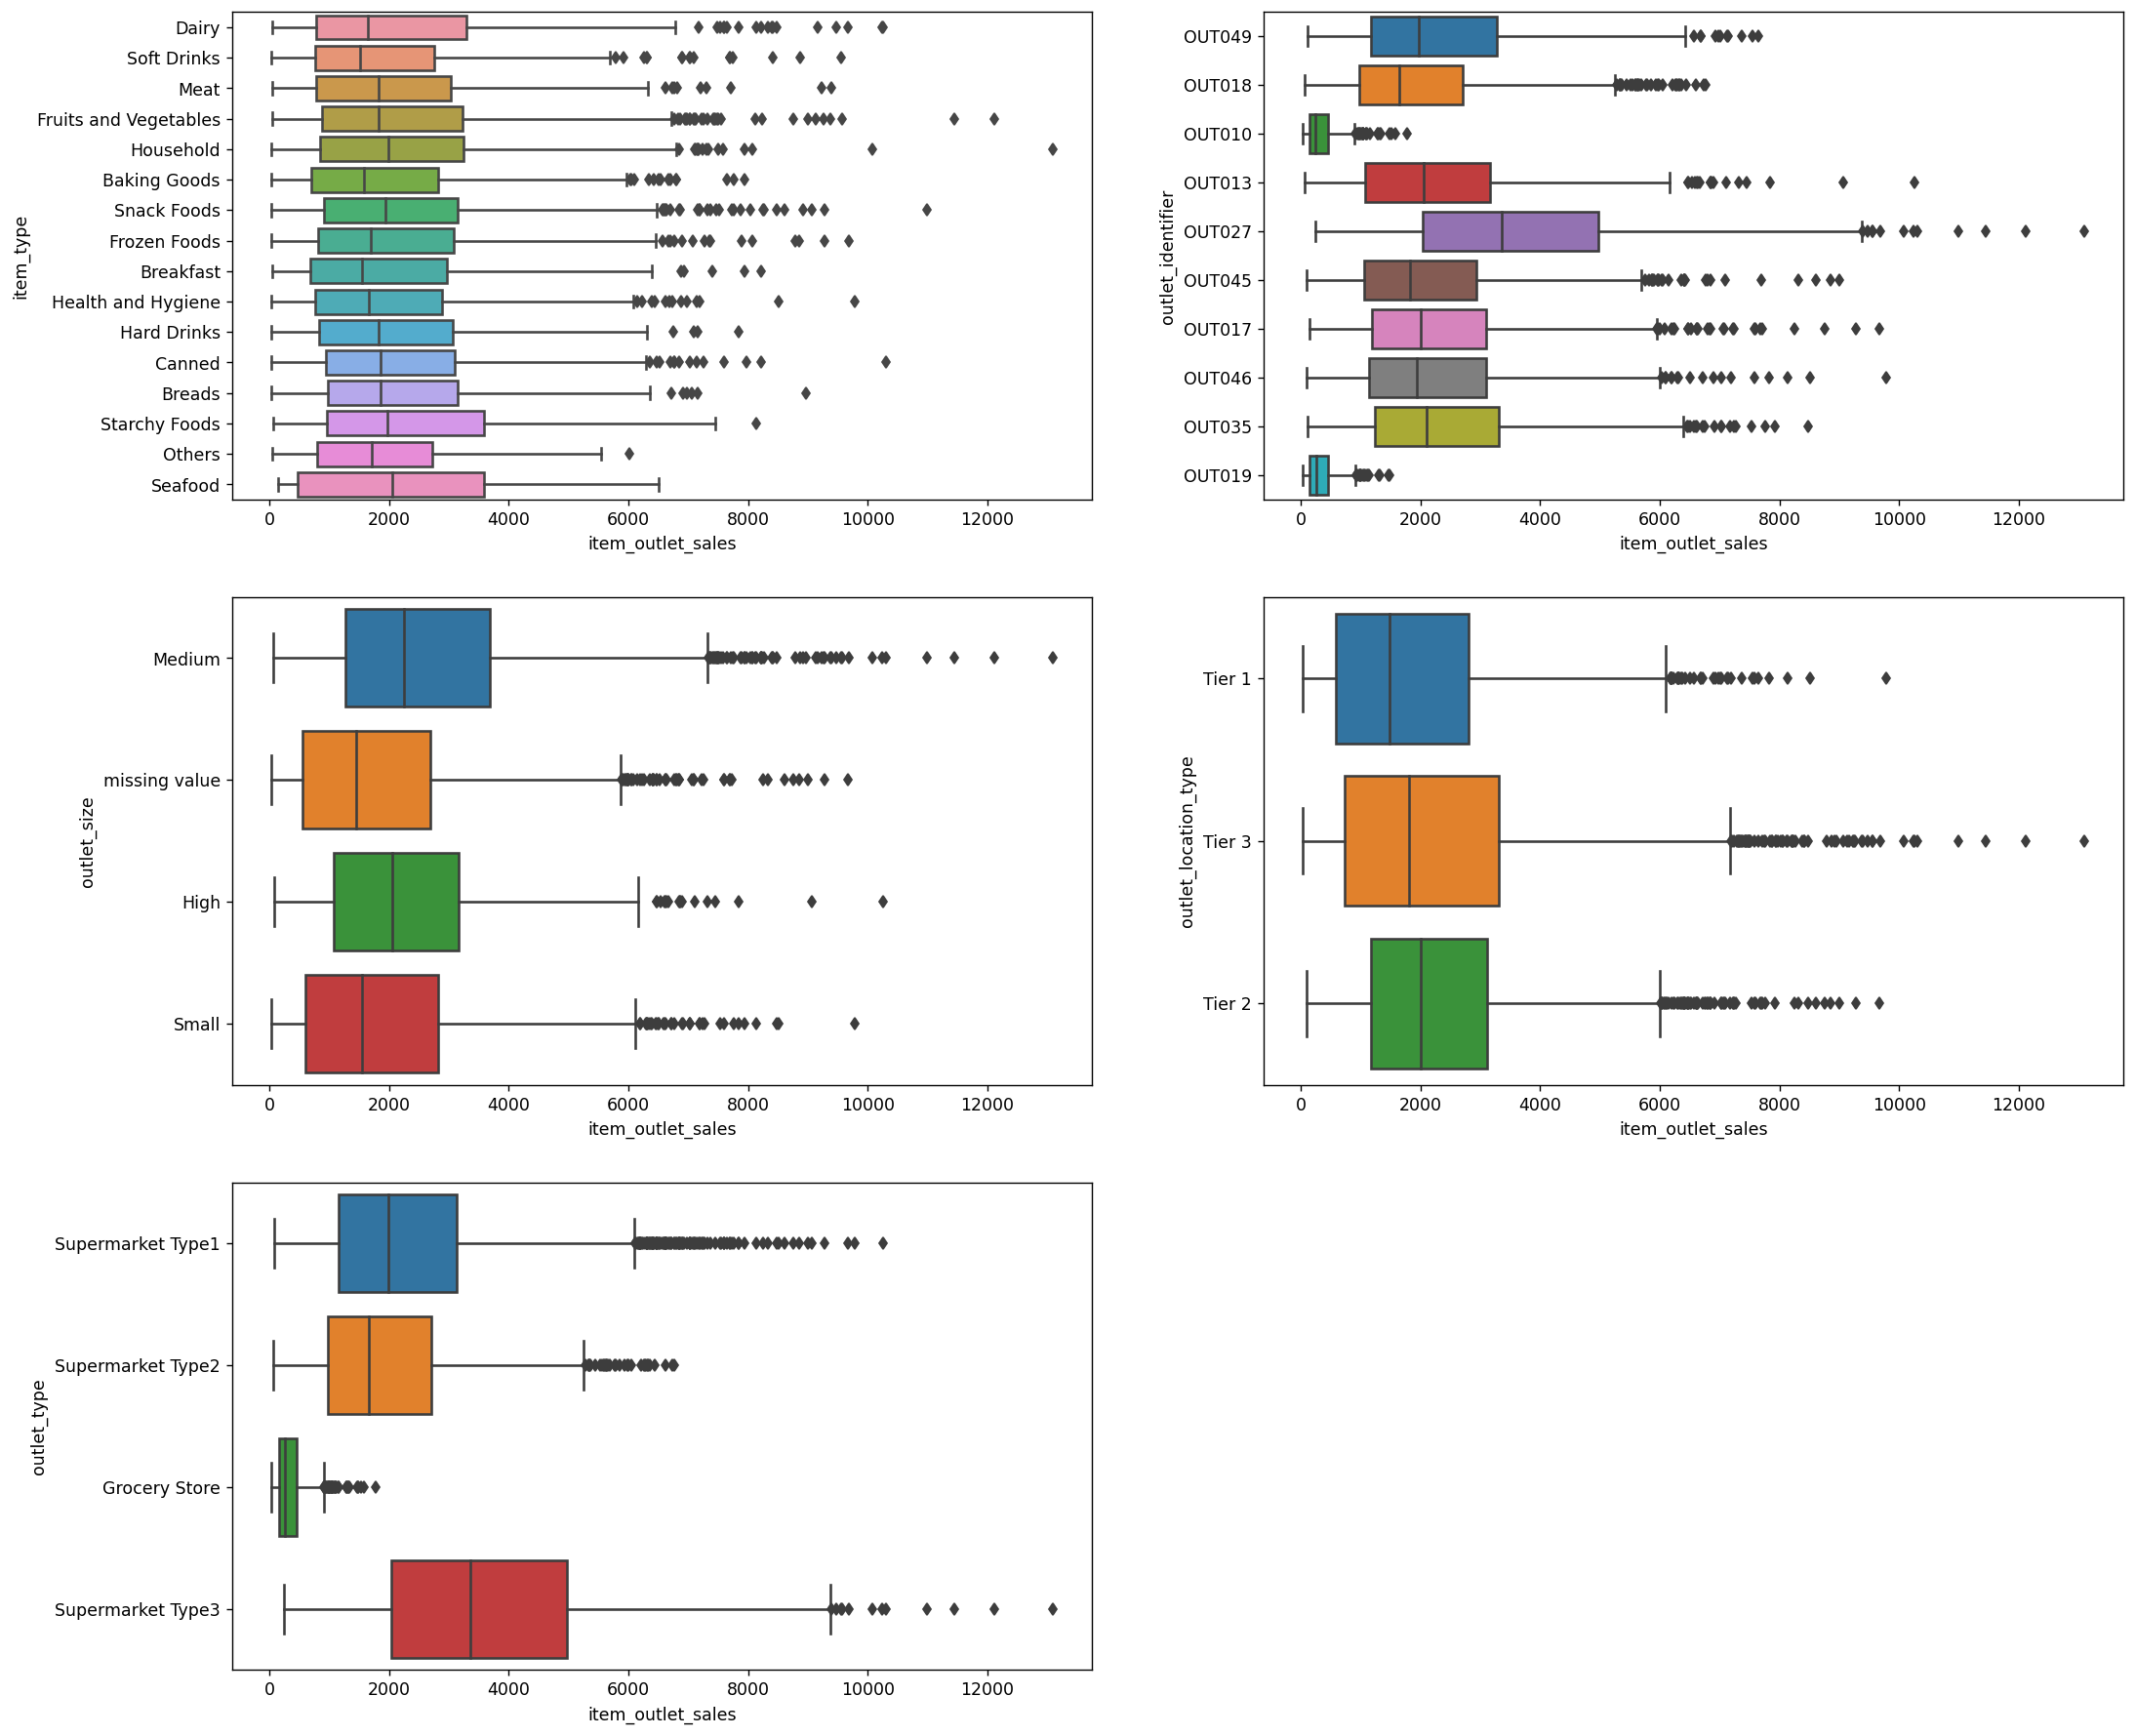

In [34]:
features = ['item_type', 'outlet_identifier', 'outlet_size', 'outlet_location_type', 'outlet_type']

plt.figure(figsize=(20, 18), dpi=125)
for i, feature in enumerate(features, 1):
  plt.subplot(3, 2, i)
  sns.boxplot(y= feature, x='item_outlet_sales', data=cln_df);

<font color='dodgerblue'> Some of these boxplots are more useful than others.  Here are some observations:</font>
<font color='dodgerblue'>
* **The Supermarket Type 3 store (OUT027) is outcompeting the other stores in sales by a healthy margin.**
* **It's clear the grocery store type stores in the dataset are outliers when it comes to sales and are outcompeted by the supermarkets.**
</font>

### <font color='green'>Explanatory Visuals</font>

#### What Types of Stores are We Looking at Here?

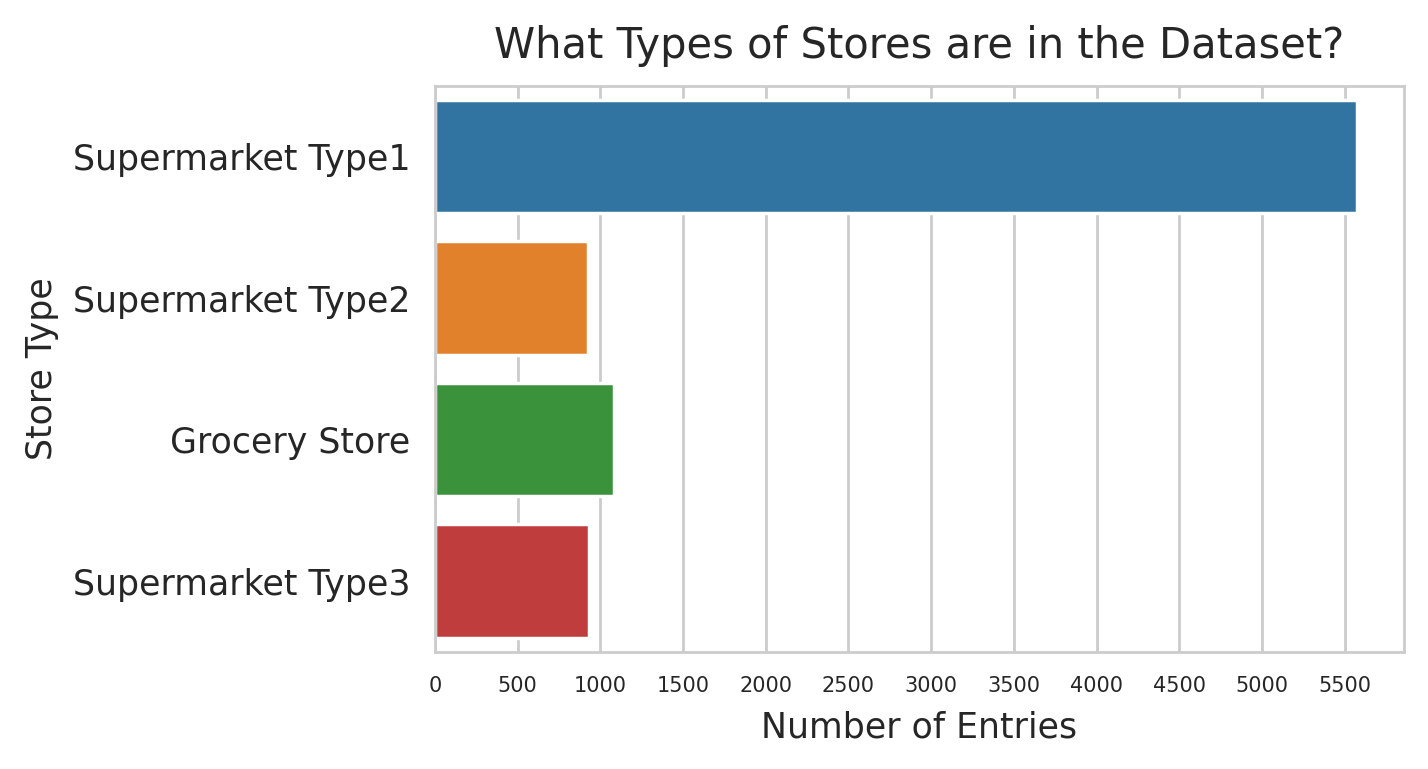

In [35]:
sns.set_style('whitegrid')
fig, g = plt.subplots(figsize=(5,3), dpi=250)
g = sns.countplot(data=cln_df, y='outlet_type')

g.set_title('What Types of Stores are in the Dataset?', pad=8)
g.set_xlabel('Number of Entries')
g.set_ylabel('Store Type')
g.set_xticks(range(0, 6000, 500))
g.set_xticklabels([i for i in g.get_xticks()], fontsize=6);

<u>Comment:</u> <br>
<font color='dodgerblue'> <i>
This Visualization is designed to show that "Supermarket Type1" is disproportionately respresented in the data.  So it is my opinion that any kind of analysis should take this into account, so we can make an apples to apples analysis of any underlying trends.  This is a data viz designed to set up the following datasets.
</i></font>

#### How Many Individual Stores is This Analysis Based On?

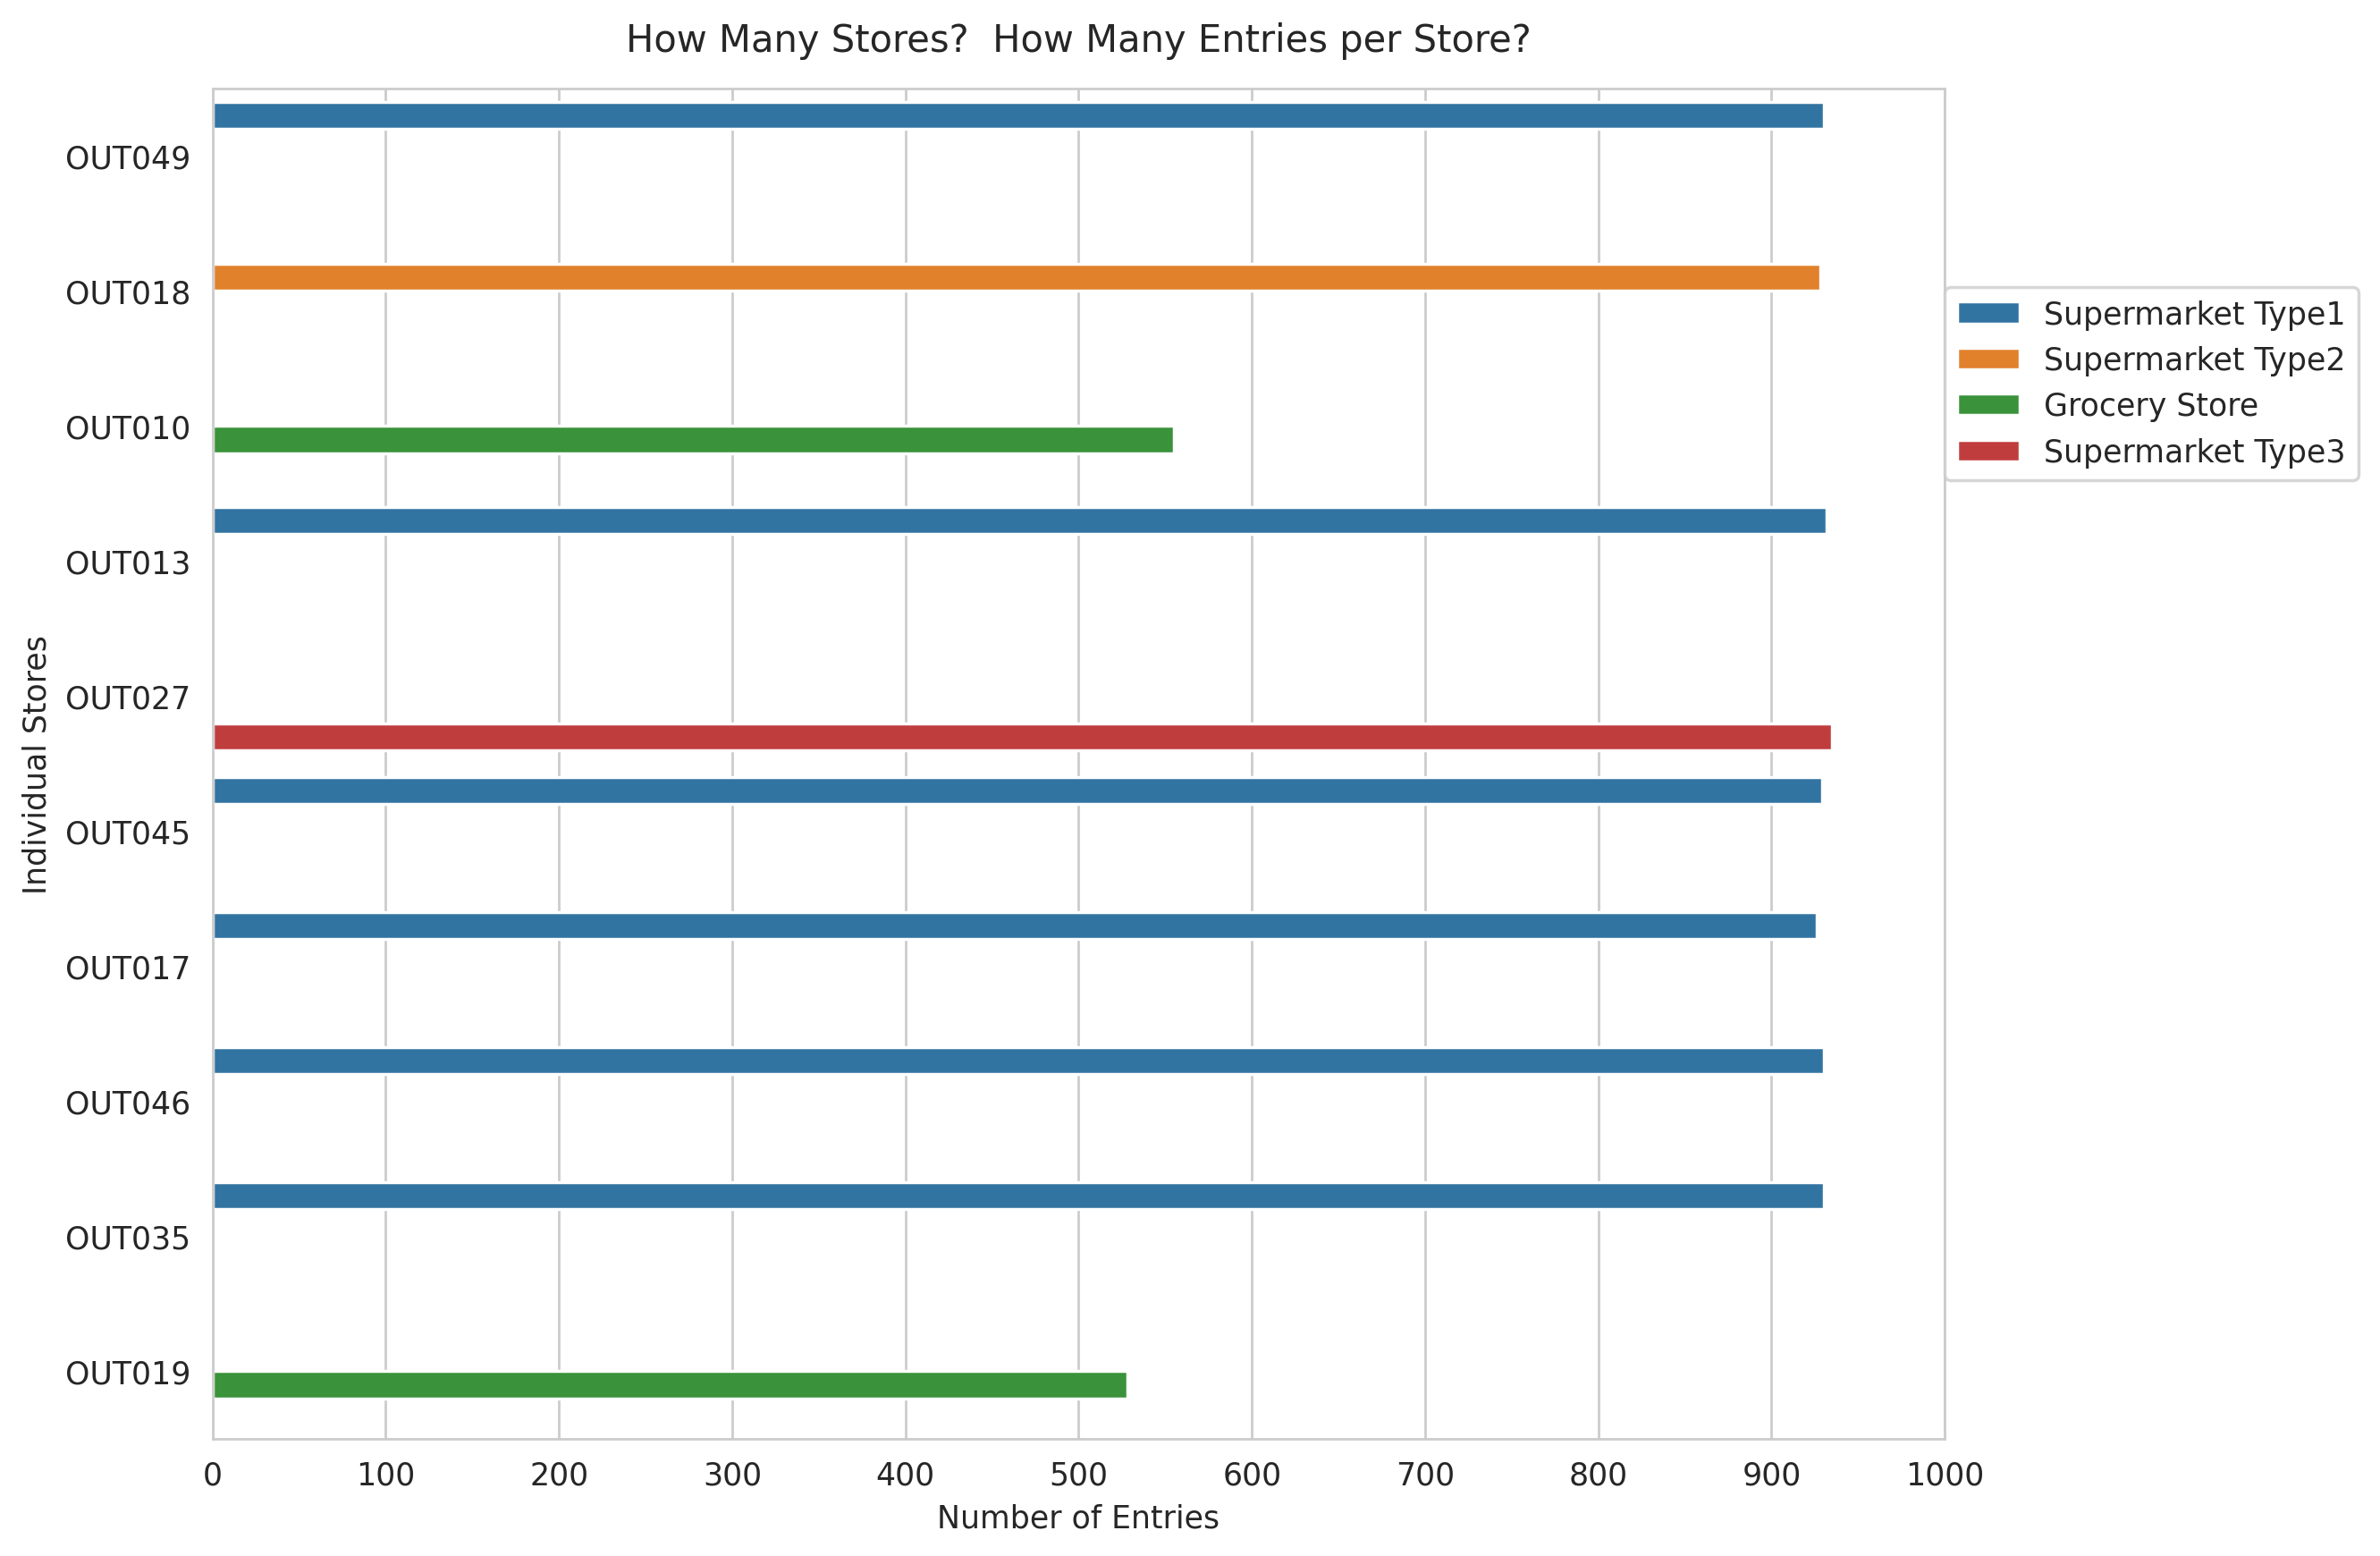

In [36]:
sns.set_style('whitegrid')
fig, g2 = plt.subplots(figsize=(10,8), dpi=250)
g2 = sns.countplot(data=cln_df, y= 'outlet_identifier', hue='outlet_type')

g2.set_title('How Many Stores?  How Many Entries per Store?', pad=12)
g2.set_ylabel('Individual Stores')
g2.set_xlabel('Number of Entries')
g2.set_xticks(range(0,1100,100))
# g2.set_xticklabels([i for i in g.get_xticks()], fontsize=8);
g2.legend(loc=(1,.71));

<u>Comment:</u> <br>
<font color='dodgerblue'> <i>
This data viz further clarifies the last visualization, showing the type of each unique store, and the number of entries that come from that store.  It shows that there is only one instance of each "Supermarket Type2" and "Supermarket Type3", and 2 instances "Grocery Store" types in the dataset.  Furthermore, the Grocery stores present have fewer entries per store than the supermarkets.
</i></font>

#### A Note on Currency in the Dataset

In [37]:
df['item_mrp'].mean()

140.9927819781767

<u>Comment:</u> <br>
<font color='dodgerblue'> <i>
Big Mart locations can be found throughout India and the UAE, while it is not explicitly stated in the data dictionary, it is likely that all currency amounts are in rupees.
* Average Indian rupee exchange rate in 2013: ₹58.5501
* Average maximum retail price in dataset: ₹140.99
* Converting to US dollars, average maximum retail price per item: $2.39
</font>

<font color='dodgerblue'>

**So, it is very likely that the currency represented in the dataset is in rupees since the conversion does not make sense in UAE dirham.  The rest of the analysis will make this assumption for convenience as the salient points are more tied to relative amounts of prices among stores.  Would consult with a subject matter expert in any event.**
</i></font>

#### Which Store Is Our Top Performer for Total Sales?

In [38]:
cln_df.groupby('outlet_identifier')['item_outlet_sales'].sum()

outlet_identifier
OUT010    1.883402e+05
OUT013    2.142664e+06
OUT017    2.167465e+06
OUT018    1.851823e+06
OUT019    1.796941e+05
OUT027    3.453926e+06
OUT035    2.268123e+06
OUT045    2.036725e+06
OUT046    2.118395e+06
OUT049    2.183970e+06
Name: item_outlet_sales, dtype: float64

<u>Comment:</u> <br>
<font color='dodgerblue'> <i>
Here we can see which store is the top performer in terms of overall sales.
</i></font>

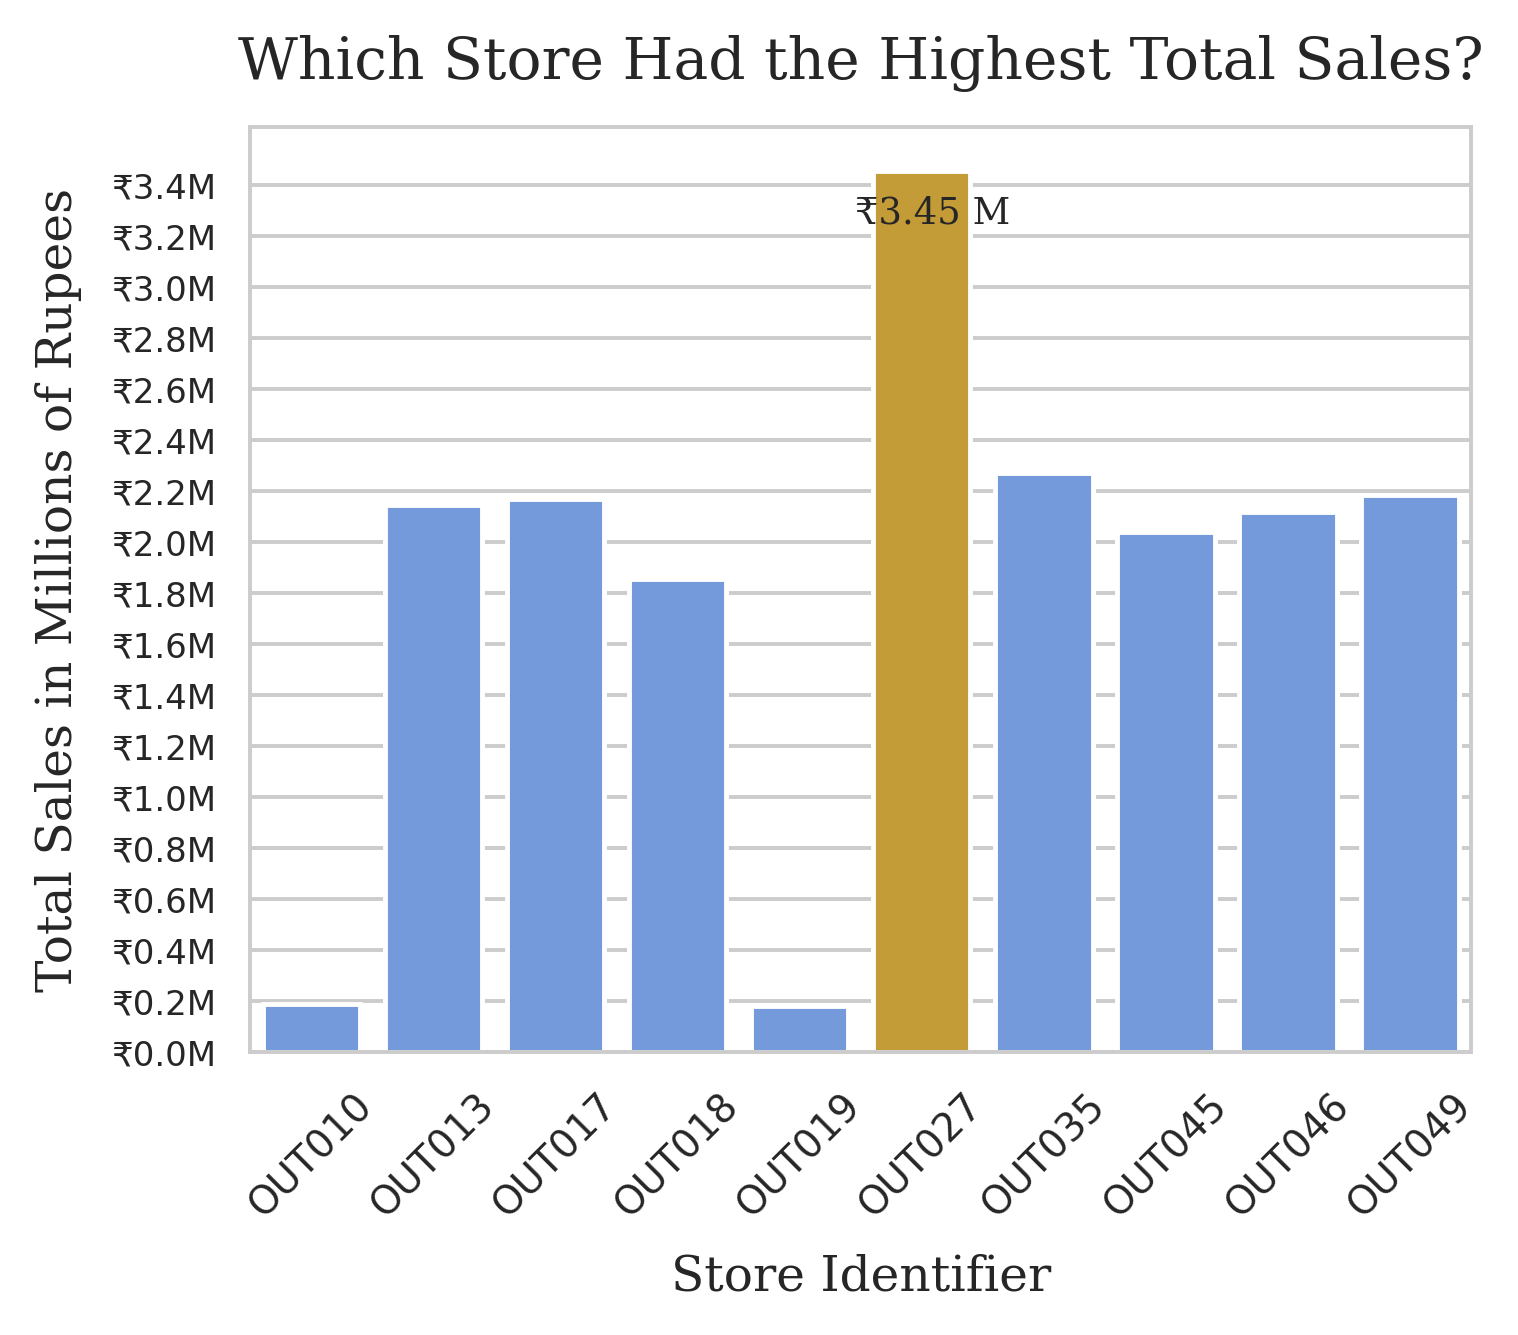

In [39]:
from matplotlib.ticker import FuncFormatter

def hundred_k(x, pos):
  """function for use wth matplotlib FuncFormatter -  formats money in millions"""
  return f'₹{x*1e-6:,.1f}M'
price_fmt_100k = FuncFormatter(hundred_k)

fig, ax = plt.subplots(figsize=(4.5,3.5), dpi=350)
total_sales = cln_df.groupby('outlet_identifier')['item_outlet_sales'].sum().reset_index()
ax = sns.barplot(data=total_sales, x='outlet_identifier', y='item_outlet_sales', 
    palette=['goldenrod' if i == 5 else 'cornflowerblue' for i in range(len(total_sales['outlet_identifier']))])

ax.set_title('Which Store Had the Highest Total Sales?', fontname='serif', pad=10)
ax.set_ylabel('Total Sales in Millions of Rupees', fontname='serif', labelpad=6)
ax.set_xlabel('Store Identifier', fontname='serif', labelpad=6)

ax.set_yticks(range(0, 3600000, 200000))
ax.set_yticklabels(ax.get_yticks(), size=7)
ax.yaxis.set_major_formatter(price_fmt_100k)
ax.set_xticklabels([i for i in total_sales['outlet_identifier']], size=8, rotation=45)
ax.annotate('₹3.45 M', xy=(4.45, 3250000), fontsize=7.6, fontname='serif');

<u>Comment:</u> <br>
<font color='dodgerblue'> <i>
This bar chart shows our top performing store (OUT027) in terms of overall sales ($3.45 Million).  It is clearly outcompeting the other stores in the dataset.
</i></font>

#### Which Specific Store is the Top Performer for each Item Type?

In [40]:
# separating by item type for each supermarket1 type store, calculating the avg price for that item type
items_by_store = cln_df.groupby(['outlet_identifier', 'item_type'])['item_outlet_sales'].mean().reset_index()

# getting the largest avg values
max_per_item = items_by_store.groupby('item_type')['item_outlet_sales'].max().reset_index()

# joining to include outlet id to show which items are top performers at which store.
best_performers = max_per_item.merge(items_by_store, on=['item_type', 'item_outlet_sales']).sort_values(['outlet_identifier', 'item_outlet_sales'])

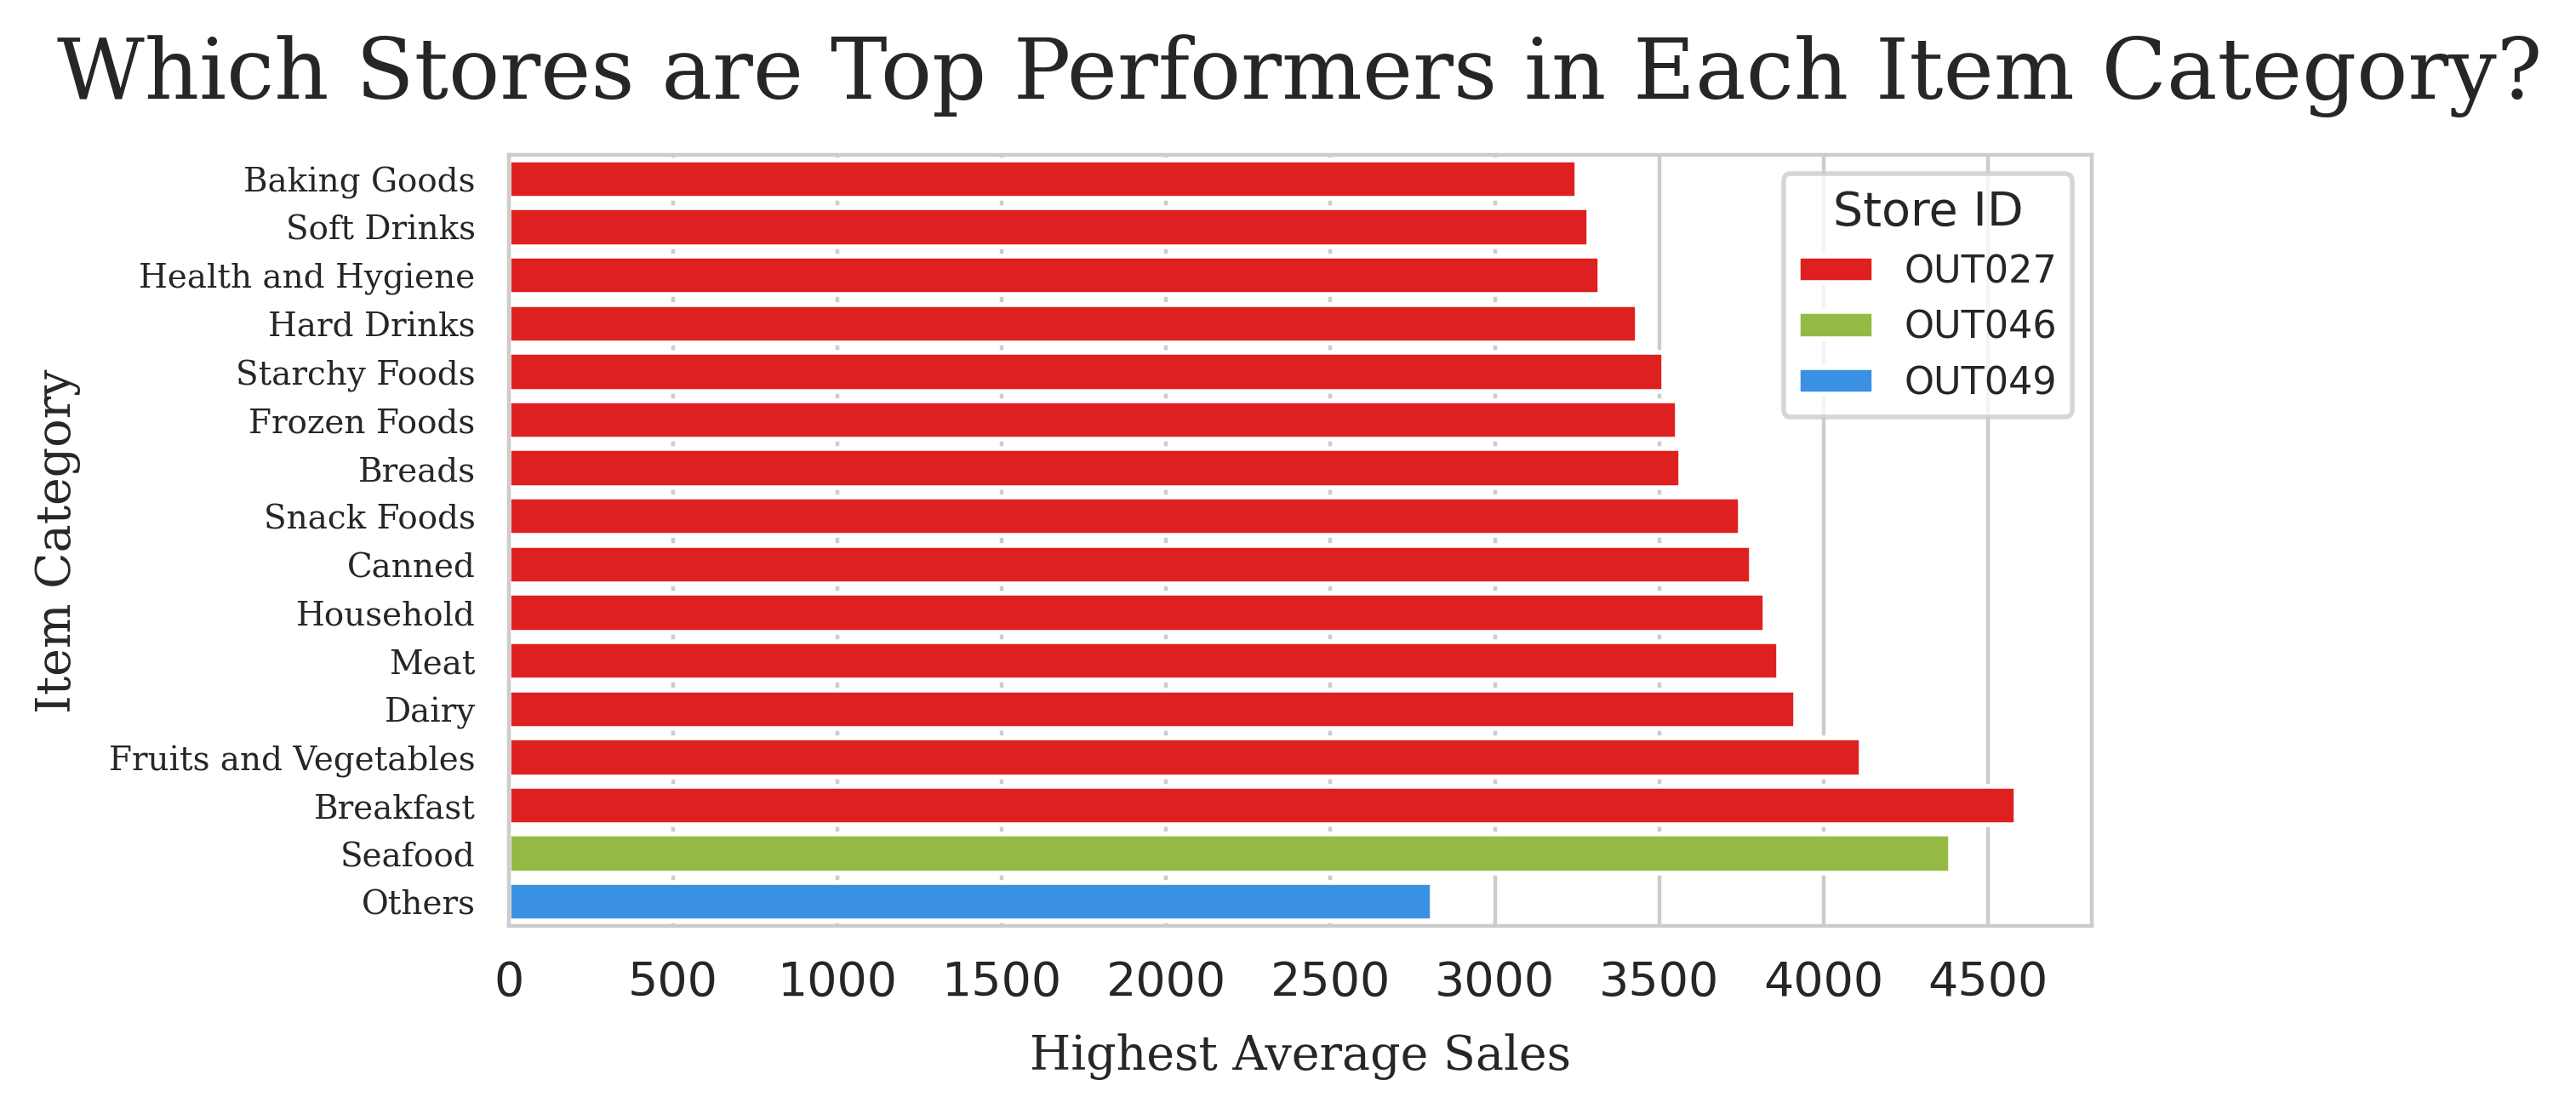

In [41]:
fig, ax2 = plt.subplots(figsize=(6, 3), dpi=400)
ax2 = sns.barplot(data=best_performers, x='item_outlet_sales', y='item_type', hue='outlet_identifier', 
                  palette=['red', 'yellowgreen', 'dodgerblue'], dodge=False)
ax2.set_yticklabels([i for i in best_performers['item_type']], fontsize=7, fontname='serif');
ax2.set_xticks([i for i in range(0, 5000, 500)])
ax2.set_title('Which Stores are Top Performers in Each Item Category?', pad=12, fontname='serif', fontsize=18)
ax2.set_xlabel('Highest Average Sales', labelpad=6, fontname='serif')
ax2.set_ylabel('Item Category', labelpad=6, fontname='serif')
ax2.legend(title='Store ID', prop={'size':8});

<u>Comment:</u> <br>
<font color='dodgerblue'> <i>
This bar chart is showing which item categories have the highest average sales for each specific store.  In other words, which specific stores are best at selling which item categories.  
Observations:</font>
<font color='dodgerblue'>
* Our top performer 027 clearly validates that it is leading in sales across nearly all item types.
* However, Store 046 is the leader in seafood sales, this might be worth investigating.
</font> <br> <br>
<font color='dodgerblue'>

**I would recommend further data collection and analysis to attempt to discover the driving factors that are leading to the high sales in the top performing store (OUT027. Location? Demographics? Layout?  
.**
</i></font>